In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
a4_init

## 2.##
To verify that everything is properly set up, run a4_main(300, 0, 0, 0). What is the validation data classification cross-entropy loss that it reports? Write the answer with at least five digits after the decimal point.

For the training data, the classification cross-entropy loss is 2.357111, and the classification error rate (i.e. the misclassification rate) is 0.878000
For the validation data, the classification cross-entropy loss is 2.360736, and the classification error rate (i.e. the misclassification rate) is 0.877000
For the test data, the classification cross-entropy loss is 2.358583, and the classification error rate (i.e. the misclassification rate) is 0.879889


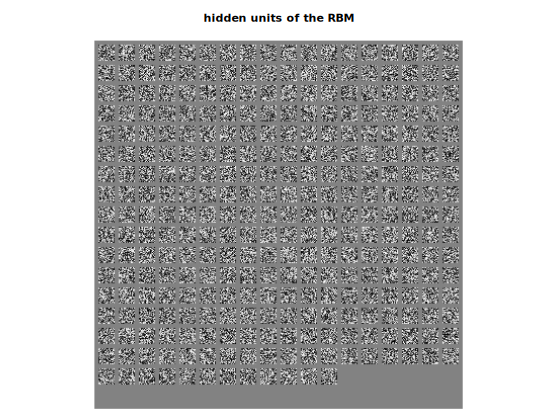

In [75]:
a4_main(300, 0, 0, 0)

## 3 ##

In [76]:
describe_matrix(visible_state_to_hidden_probabilities(test_rbm_w, data_37_cases))

Describing a matrix of size 100 by 37. The mean of the elements is 0.466207. The sum of the elements is 1724.967611


## 4. hidden_state_to_visible_probabilities ##

In [77]:
describe_matrix(hidden_state_to_visible_probabilities(test_rbm_w, test_hidden_state_37_cases))

Describing a matrix of size 37 by 256. The mean of the elements is 0.463595. The sum of the elements is 4391.169583


## 5.configuration_goodness ##

In [78]:
configuration_goodness(test_rbm_w, data_37_cases, test_hidden_state_37_cases)

ans = -18.391


## 6. configuration_goodness_gradient ##

In [80]:
describe_matrix(configuration_goodness_gradient(data_37_cases, test_hidden_state_37_cases))

Describing a matrix of size 100 by 256. The mean of the elements is 0.123680. The sum of the elements is 3166.216216


## 7.cd1 ##

In [83]:
describe_matrix(cd1(test_rbm_w, data_1_case))

sample_bernoulli() was called with a matrix of size 100 by 1. sample_bernoulli() was called with a matrix of size 256 by 1. sample_bernoulli() was called with a matrix of size 100 by 1. Describing a matrix of size 100 by 256. The mean of the elements is -0.160742. The sum of the elements is -4115.000000


In [89]:
describe_matrix(cd1(test_rbm_w, data_10_cases))

sample_bernoulli() was called with a matrix of size 100 by 10. sample_bernoulli() was called with a matrix of size 256 by 10. sample_bernoulli() was called with a matrix of size 100 by 10. Describing a matrix of size 100 by 256. The mean of the elements is -0.185137. The sum of the elements is -4739.500000


In [90]:
describe_matrix(cd1(test_rbm_w, data_37_cases))

sample_bernoulli() was called with a matrix of size 100 by 37. sample_bernoulli() was called with a matrix of size 256 by 37. sample_bernoulli() was called with a matrix of size 100 by 37. Describing a matrix of size 100 by 256. The mean of the elements is -0.182409. The sum of the elements is -4669.675676


## 8. Improving CD-1 ##

If you go through the math (either on your own on with your fellow students on the forum), you'll see that sampling the hidden state that results from the "reconstruction" visible state is useless: it does not change theexpected value of the gradient estimate that CD-1 produces; it only increases its variance. More variance means that we have to use a smaller learning rate, and that means that it'll learn more slowly; in other words, we don't want more variance, especially if it doesn't give us anything pleasant to compensate for that slower learning. 

Let's modify the CD-1 implementation to simply no longer do that sampling at the hidden state that results from the "reconstruction" visible state. Instead of a sampled state, we'll simply use the conditional probabilities. Of course, the configuration goodness gradient function expects a binary state, but you've probably already implemented it in such a way that it can gracefully take probabilities instead of binary states. If not, now would be a good time to do that. After improving the CD-1 implementation that way, running describe_matrix(cd1(test_rbm_w, data_1_case))gives me this:

In [99]:
describe_matrix(cd1_improved(test_rbm_w, data_1_case))

sample_bernoulli() was called with a matrix of size 100 by 1. sample_bernoulli() was called with a matrix of size 256 by 1. Describing a matrix of size 100 by 256. The mean of the elements is -0.164335. The sum of the elements is -4206.981332


In [101]:
describe_matrix(cd1_improved(test_rbm_w, data_10_cases))

sample_bernoulli() was called with a matrix of size 100 by 10. sample_bernoulli() was called with a matrix of size 256 by 10. Describing a matrix of size 100 by 256. The mean of the elements is -0.185591. The sum of the elements is -4751.142054


In [102]:
describe_matrix(cd1_improved(test_rbm_w, data_37_cases))

sample_bernoulli() was called with a matrix of size 100 by 37. sample_bernoulli() was called with a matrix of size 256 by 37. Describing a matrix of size 100 by 256. The mean of the elements is -0.184222. The sum of the elements is -4716.094972


## 9. Training an RBM on real-valued pixel intensities ##

We want to train our RBM on the handwritten digit data that we used in PA3, but that presents a problem: that data is not binary (it's pixel intensities between 0 and 1), but our RBM is designed for binary data.We'll treat each training data case as a distribution over binary data vectors. A product of independent Bernoulli-distributed random variables, if you like mathematical descriptions. What it means in practice is that every time we have a real-valued data case, we turn it into a binary one by sampling a state for each visible unit, where we treat the real-valued pixel intensity as the probability of the unit turning on. Let's add this line of code as the new first line of the cd1 function: visible_data = sample_bernoulli(visible_data);Now we're ready to start training our RBM. (By the way, if that description was a little too brief or unclear to be maximally helpful, then ask on the forum and we'll have a group discussion about it.)

### Part 3: Using the RBM as part of a feedforward network ###

Here's the plan: we're going to train an RBM (using CD-1), and then we're going to make the weights of that RBM into the weights from the input layer to the hidden layer, in the deterministic feed-forward network that we used for PA3 . We're not going to tell the RBM that that's how it's going to end up being used, but a variety of practical and theoretical findings over the past several years have shown that this is a reasonable thing to do anyway. The lectures explain this in more detail.This brings up an interesting contrast with PA3. In PA3, we tried to reduce overfitting by learning less (early stopping, fewer hidden units, etc). This approach with the RBM, on the other hand, reduces overfitting by learning more: the RBM part is being trained unsupervised, so it's working to discover a lot of relevant regularity in the distribution of the input images, and that learning distracts the model from excessively focusing on the digit class labels. This is much more constructive distraction: instead of early-stopping the model after only a little bit of learning, we instead give the model something much more meaningful to do. In any case, it works great for regularization, as well as training speed (though the advantage in training speed becomes most visible when we use multiple hidden layers, which we're not doing here).We're using exactly the same data as we did in PA3, so the results will be comparable (but of course the results of PA4 will be better than those of PA3).In PA3, we did a very careful job of selecting the right number of training iterations, the right number of hidden units, and the right weight decay. For PA4, we don't need to do all that: although it might still help a little, the unsupervised training of the RBM basically provides all the regularization we need. If we select a decent learning rate, that will be plenty. We'll use lots of hidden units, because we're much less worried about overfitting now.Script a4_main trains an RBM using your CD-1 implementation. Then it turns that RBM into the input-to-hidden weight matrix of the NN of PA3, and trains the hidden-to-class layer in basically the same way as we did it in PA3. Normally one would also want to keep training those input-to-hidden weights using the backpropagation-based learning, i.e. one would use the RBM as initialization and then do exactly what we did in PA3, but it's not absolutely necessary. I decided not to do that here because then I'd have to either ask you to use your PA3 code, or I'd have to give you the PA3 solution, and lots of students are still working on PA3.An initial run a4_main(300, .02, .005, 1000) should give you an interesting display of what the RBM learns, as well as the classification loss and error rates, like we saw them in PA3. If the validation data classification cross-entropy loss on that run was not 0.322890 (that's what I got) or something very close to that, then you might have a bug in your code and you should address that first. (If you got 0.336870, carefully read over question 8 again.) Keep the number of hidden units at 300, the learning rate for the RBM at 0.02, and the number of iterations at 1000. Explore what learning rate for the hidden-to-class weights works best, where "best" means best for the validation data classification cross-entropy loss. Report that learning rate. If your answer is more than 0.5 times what I found with a very extensive search, and less than 2 times what I found, then it will be considered correct for this question.

For the training data, the classification cross-entropy loss is 0.299221, and the classification error rate (i.e. the misclassification rate) is 0.059000
For the validation data, the classification cross-entropy loss is 0.341551, and the classification error rate (i.e. the misclassification rate) is 0.081000
For the test data, the classification cross-entropy loss is 0.354801, and the classification error rate (i.e. the misclassification rate) is 0.090000


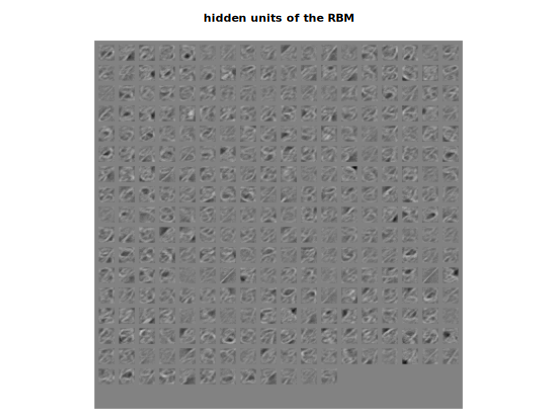

In [104]:
a4_main(300, .02, .005, 1000)

0.005 -> 0.341551

0.08 -> 0.188644

0.12 -> 0.185846

**0.14 -> 0.185489**

0.16 -> 0.185508

0.32 -> 0.190380

0.64 -> 0.204291

For the training data, the classification cross-entropy loss is 0.028972, and the classification error rate (i.e. the misclassification rate) is 0.000000
For the validation data, the classification cross-entropy loss is 0.185489, and the classification error rate (i.e. the misclassification rate) is 0.052000
For the test data, the classification cross-entropy loss is 0.208549, and the classification error rate (i.e. the misclassification rate) is 0.065556


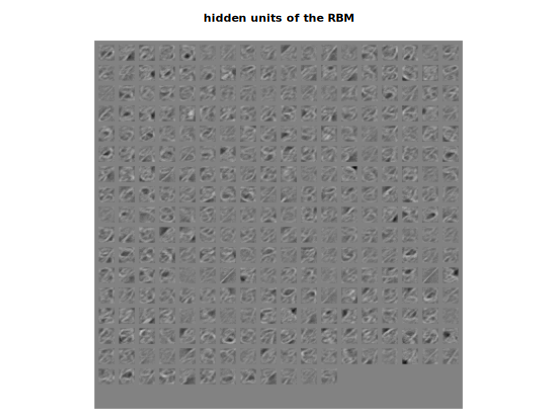

In [115]:
a4_main(300, .02, .14, 1000)